In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# para mostrar todas las columnas y todas las filas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [54]:
df = pd.read_csv('../../Data/02ParaLimpiar/02desastres_definitivo.csv', encoding='utf-8', delimiter=';', engine='python')

In [56]:
drought_filter = (df['Disaster Type'] == 'Drought')
df_drought = df[drought_filter]
df_drought.head()

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,Countrywide,NaN,Famine,NaN,Km2,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,11000.0,NaN,NaN
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,Bengal,NaN,NaN,NaN,Km2,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,1250000.0,NaN,NaN
24,1910-9006-BFA,1910,9006,Climatological,Drought,Drought,Burkina Faso,BFA,Western Africa,Africa,NaN,NaN,NaN,NaN,Km2,NaN,NaN,1910,NaN,NaN,1914,NaN,NaN,NaN,NaN,NaN
27,1910-9006-CPV,1910,9006,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,NaN,NaN,NaN,NaN,Km2,NaN,NaN,1910,NaN,NaN,1914,NaN,NaN,NaN,NaN,NaN
30,1910-9006-GMB,1910,9006,Climatological,Drought,Drought,Gambia (the),GMB,Western Africa,Africa,NaN,NaN,NaN,NaN,Km2,NaN,NaN,1910,NaN,NaN,1914,NaN,NaN,NaN,NaN,NaN


In [57]:
df_drought.shape

(803, 26)

In [58]:
df_drought[['Start Year', 'End Year']].isnull().sum()

Start Year    0
End Year      0
dtype: int64

In [59]:
df_drought['Duration'] = df_drought['End Year']-df_drought['Start Year']
df_drought['Duration'].value_counts()

C:\Users\blanc\AppData\Local\Temp\ipykernel_23132\2714018211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drought['Duration'] = df_drought['End Year']-df_drought['Start Year']


0    497
1    181
2     54
4     31
3     24
5     11
6      3
9      2
Name: Duration, dtype: int64

De los 803 eventos de sequía, más de la mitad no han llegado a un año de duración y casi una cuarta parte han durado un año

In [60]:
df_drought.shape

(803, 27)

In [61]:
df_drought.head(10)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj,Duration
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,Countrywide,NaN,Famine,NaN,Km2,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,11000.0,NaN,NaN,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,Bengal,NaN,NaN,NaN,Km2,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,1250000.0,NaN,NaN,0
24,1910-9006-BFA,1910,9006,Climatological,Drought,Drought,Burkina Faso,BFA,Western Africa,Africa,NaN,NaN,NaN,NaN,Km2,NaN,NaN,1910,NaN,NaN,1914,NaN,NaN,NaN,NaN,NaN,4
27,1910-9006-CPV,1910,9006,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,NaN,NaN,NaN,NaN,Km2,NaN,NaN,1910,NaN,NaN,1914,NaN,NaN,NaN,NaN,NaN,4
30,1910-9006-GMB,1910,9006,Climatological,Drought,Drought,Gambia (the),GMB,Western Africa,Africa,NaN,NaN,NaN,NaN,Km2,NaN,NaN,1910,NaN,NaN,1914,NaN,NaN,NaN,NaN,NaN,4
31,1910-9006-GNB,1910,9006,Climatological,Drought,Drought,Guinea-Bissau,GNB,Western Africa,Africa,NaN,NaN,NaN,NaN,Km2,NaN,NaN,1910,NaN,NaN,1914,NaN,NaN,NaN,NaN,NaN,4
50,1919-9006-AIA,1919,9006,Climatological,Drought,Drought,Anguilla,AIA,Caribbean,Americas,NaN,NaN,NaN,NaN,Km2,NaN,NaN,1919,NaN,NaN,1923,NaN,NaN,NaN,NaN,NaN,4
54,1920-9004-CPV,1920,9004,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,Countrywide,NaN,Famine,NaN,Km2,NaN,NaN,1920,NaN,NaN,1920,NaN,NaN,24000.0,NaN,NaN,0
56,1920-9003-CHN,1920,9003,Climatological,Drought,Drought,China,CHN,Eastern Asia,Asia,North,NaN,NaN,NaN,Km2,NaN,NaN,1920,NaN,NaN,1920,NaN,NaN,500000.0,20000000.0,NaN,0
96,1928-9002-CHN,1928,9002,Climatological,Drought,Drought,China,CHN,Eastern Asia,Asia,"Shensi, Honan, Kansu",NaN,NaN,NaN,Km2,NaN,NaN,1928,NaN,NaN,1928,NaN,NaN,3000000.0,NaN,NaN,0


In [62]:
df_drought.tail()

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj,Duration
16479,2022-9785-MWI,2022,9785,Climatological,Drought,Drought,Malawi,MWI,Eastern Africa,Africa,NaN,NaN,NaN,NaN,Km2,NaN,NaN,2022,NaN,NaN,2022,11.0,NaN,NaN,2678193.0,NaN,0
16486,2022-9787-NGA,2022,9787,Climatological,Drought,Drought,Nigeria,NGA,Western Africa,Africa,NaN,NaN,NaN,NaN,Km2,NaN,NaN,2022,NaN,NaN,2022,11.0,NaN,NaN,19110398.0,NaN,0
16506,2022-9788-SDN,2022,9788,Climatological,Drought,Drought,Sudan (the),SDN,Northern Africa,Africa,NaN,NaN,NaN,NaN,Km2,NaN,NaN,2022,NaN,NaN,2022,11.0,NaN,NaN,11839300.0,NaN,0
16534,2022-9863-URY,2022,9863,Climatological,Drought,Drought,Uruguay,URY,South America,Americas,"Cerro Largo, Florida, Lavalleja, San Jose, Tac...",Lack of rainfall recorded since September 2022,NaN,NaN,Km2,NaN,NaN,2022,10.0,NaN,2023,4.0,NaN,NaN,409115.0,NaN,1
16557,2022-9784-COD,2022,9784,Climatological,Drought,Drought,Congo (the Democratic Republic of the),COD,Middle Africa,Africa,NaN,NaN,NaN,NaN,Km2,NaN,NaN,2022,NaN,NaN,2022,11.0,NaN,NaN,25972806.0,NaN,0


## PIVOT TABLE: Location, Country, Region, Continent, Year, Associated Dis, Total Deaths, Total Affected, Total Damages Adj

In [63]:
pivot_table_1 = pd.pivot_table(df_drought, index= 'Year', aggfunc='size')
pivot_table_1


Year
1900     2
1903     1
1906     1
1910     9
1919     1
1920     2
1921     1
1928     1
1931     1
1933     1
1940     9
1942     1
1943     1
1946     1
1947     1
1960     1
1961     1
1963     1
1964     7
1965     7
1966     9
1967     5
1968     7
1969    14
1970     2
1971     6
1972     4
1973     3
1974     3
1975     1
1976    10
1977    13
1978     8
1979    11
1980    24
1981    18
1982     6
1983    26
1984     6
1985     3
1986     4
1987    15
1988    17
1989     7
1990    20
1991    12
1992    11
1993     9
1994    12
1995     6
1996     7
1997    17
1998    20
1999    26
2000    25
2001    22
2002    24
2003    14
2004    11
2005    20
2006     9
2007    11
2008    16
2009    18
2010    21
2011    16
2012    18
2013     9
2014    20
2015    27
2016    14
2017    12
2018    17
2019    15
2020    12
2021    16
2022    23
2023     1
dtype: int64

In [65]:
# Crear pivot table considerada pivot principal
pivot_table_drought = df_drought.pivot_table(index=['Country', 'Region', 'Continent', 'Associated Dis', 'Year'], values='Duration', aggfunc='count')
pivot_table_drought

Duration
Country                                     Region                    Continent Associated Dis     Year          
Afghanistan                                 Southern Asia             Asia      Food shortage      1969         1
                                                                                                   2008         1
                                                                                                   2011         1
                                                                                                   2018         1
                                                                                                   2021         1
                                                                                Water shortage     2000         1
Angola                                      Middle Africa             Africa    Famine             2001         1
                                                                                Food shortage      1981         1
                                                                                                   2004         1
                                                                                                   2012         1
                                                                                                   2017         1
                                                                                                   2020         1
Argentina                                   South America             Americas  Wildfire           2009         1
Armenia                                     Western Asia              Asia      Heat wave          2000         1
Australia                                   Australia and New Zealand Oceania   Wildfire           2002         1
Bangladesh                                  Southern Asia             Asia      Famine             1943         1
Benin                                       Western Africa            Africa    Famine             1969         1
                                                                                Food shortage      1980         1
Bolivia (Plurinational State of)            South America             Americas  Water shortage     1990         1
                                                                                                   2016         1
Bosnia and Herzegovina                      Southern Europe           Europe    Heat wave          2000         1
Botswana                                    Southern Africa           Africa    Food shortage      2019         1
Bulgaria                                    Eastern Europe            Europe    Food shortage      1983         1
Burkina Faso                                Western Africa            Africa    Crop failure       1988         1
                                                                                Famine             1940         1
                                                                                                   1969         1
                                                                                Food shortage      1995         1
                                                                                                   1998         1
                                                                                                   2011         1
                                                                                                   2014         1
                                                                                                   2020         1
Burundi                                     Eastern Africa            Africa    Crop failure       2005         1
                                                                                Food shortage      2008         1
                                                                                                   2009         1
C

In [66]:
pivot_table_drought1 = df_drought.pivot_table(index=['Year', 'Continent', 'Region', 'Country'], columns= 'Associated Dis', values='Total Affected')
pivot_table_drought1

Associated Dis                                                                 Cold wave  \
Year Continent Region             Country                                                  
1921 Europe    Russian Federation Soviet Union                                       NaN   
1931 Americas  Northern America   Canada                                             NaN   
1964 Asia      Southern Asia      India                                              NaN   
                                  Iran (Islamic Republic of)                         NaN   
1965 Asia      Southern Asia      India                                              NaN   
1966 Asia      South-Eastern Asia Indonesia                                          NaN   
1969 Africa    Middle Africa      Chad                                               NaN   
               Western Africa     Benin                                              NaN   
                                  Burkina Faso                                       NaN   
                                  Gambia (the)                                       NaN   
                                  Mauritania                                         NaN   
                                  Senegal                                            NaN   
     Asia      Southern Asia      Afghanistan                                        NaN   
1973 Africa    Eastern Africa     Ethiopia                                           NaN   
                                  Somalia                                            NaN   
1976 Africa    Eastern Africa     Rwanda                                             NaN   
1977 Americas  Caribbean          Haiti                                              NaN   
1978 Africa    Middle Africa      Congo (the Democratic Republic of the)             NaN   
     Asia      South-Eastern Asia Indonesia                                          NaN   
1979 Africa    Eastern Africa     Kenya                                              NaN   
1980 Africa    Middle Africa      Chad                                               NaN   
               Western Africa     Benin                                              NaN   
                                  Gambia (the)                                       NaN   
                                  Ghana                                              NaN   
     Americas  Caribbean          Haiti                                              NaN   
     Oceania   Melanesia          Papua New Guinea                                   NaN   
1981 Africa    Middle Africa      Angola                                             NaN   
               Eastern Africa     Madagascar                                         NaN   
1982 Asia      Southern Asia      Sri Lanka                                          NaN   
1983 Africa    Eastern Africa     Kenya                                              NaN   
               Southern Africa    Lesotho                                            NaN   
     Americas  Central America    Panama                                             NaN   
1984 Africa    Eastern Africa     Rwanda                                             NaN   
1986 Africa    Southern Africa    South Africa                                       NaN   
1987 Africa    Eastern Africa     Malawi                                             NaN   
1988 Africa    Western Africa     Burkina Faso                                       NaN   
               Eastern Africa     Madagascar                                         NaN   
               Southern Africa    South Africa                                       NaN   
     Asia      Eastern Asia       China                                              NaN   
1989 Africa    Western Africa     Togo                                               NaN   
               Eastern Africa     Ethiopia                                           NaN   
                                  Rwanda    

In [67]:
# Filtrar el dataset original
filtered_china = df['Country'] == 'China'
df_drought[filtered_china].head()

C:\Users\blanc\AppData\Local\Temp\ipykernel_23132\1285528520.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_drought[filtered_china].head()


,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj,Duration
56,1920-9003-CHN,1920,9003,Climatological,Drought,Drought,China,CHN,Eastern Asia,Asia,North,NaN,NaN,NaN,Km2,NaN,NaN,1920,NaN,NaN,1920,NaN,NaN,500000.0,20000000.0,NaN,0
96,1928-9002-CHN,1928,9002,Climatological,Drought,Drought,China,CHN,Eastern Asia,Asia,"Shensi, Honan, Kansu",NaN,NaN,NaN,Km2,NaN,NaN,1928,NaN,NaN,1928,NaN,NaN,3000000.0,NaN,NaN,0
390,1965-9080-CHN,1965,9080,Climatological,Drought,Drought,China,CHN,Eastern Asia,Asia,"Central, South-West",NaN,NaN,NaN,Km2,NaN,NaN,1965,3.0,NaN,1965,4.0,NaN,NaN,NaN,251877.0,0
1999,1978-9008-CHN,1978,9008,Climatological,Drought,Drought,China,CHN,Eastern Asia,Asia,"Anhwei, Kiangsu Province",NaN,NaN,NaN,Km2,NaN,NaN,1978,NaN,NaN,1978,NaN,NaN,NaN,6000000.0,NaN,0
2024,1979-9004-CHN,1979,9004,Climatological,Drought,Drought,China,CHN,Eastern Asia,Asia,Hwei province,NaN,NaN,NaN,Km2,NaN,NaN,1979,NaN,NaN,1982,NaN,NaN,NaN,NaN,NaN,3


In [68]:
# cuenta por continente y año el número de sequías que se han producido. He usado Country como valores para que contabilice las sequías por una columna sin nulos
pivot_table1 = pd.pivot_table(df_drought, index='Continent', columns='Start Year', values='Country', aggfunc='count')
print(pivot_table1)

Start Year  1900  1903  1906  1910  1919  1920  1921  1928  1931  1933  1940  \
Continent                                                                      
Africa       1.0   1.0   1.0   9.0   NaN   1.0   NaN   NaN   NaN   NaN   9.0   
Americas     NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   1.0   1.0   NaN   
Asia         1.0   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN   
Europe       NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   
Oceania      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Start Year  1942  1943  1946  1947  1960  1961  1963  1964  1965  1966  1967  \
Continent                                                                      
Africa       NaN   NaN   1.0   NaN   NaN   NaN   NaN   2.0   4.0   6.0   2.0   
Americas     NaN   NaN   NaN   NaN   NaN   1.0   1.0   1.0   1.0   1.0   NaN   
Asia         1.0   1.0   NaN   1.0   1.0   NaN   NaN   4.0   2.0   2.0   2.0   
Europe       NaN   NaN   NaN   NaN   Na

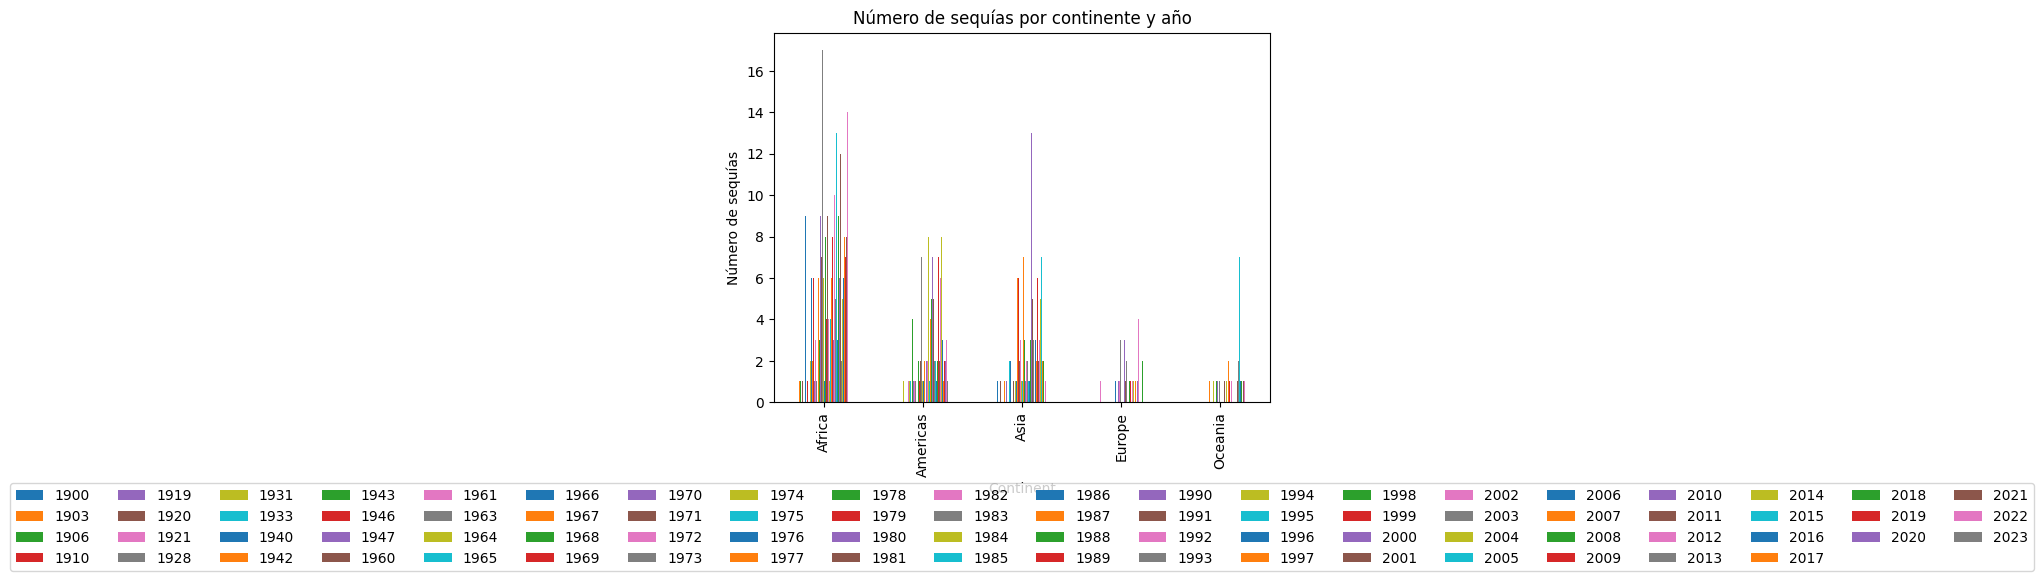

In [69]:
ax = pivot_table1.plot(kind='bar')
plt.title('Número de sequías por continente y año')
plt.xlabel('Continent')
plt.ylabel('Número de sequías')

# Cambiar la posición y el tamaño de la leyenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=20)
plt.show()


In [41]:
pivot_table2 = pd.pivot_table(df_drought, index='Region', columns='Start Year', values='ISO', aggfunc='count')
print(pivot_table2)

Start Year                 1900  1903  1906  1910  1919  1920  1921  1928  \
Region                                                                      
Australia and New Zealand   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Caribbean                   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   
Central America             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Central Asia                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Eastern Africa              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Eastern Asia                NaN   NaN   NaN   NaN   NaN   1.0   NaN   1.0   
Eastern Europe              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Melanesia                   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Micronesia                  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Middle Africa               NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   
Northern Africa             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

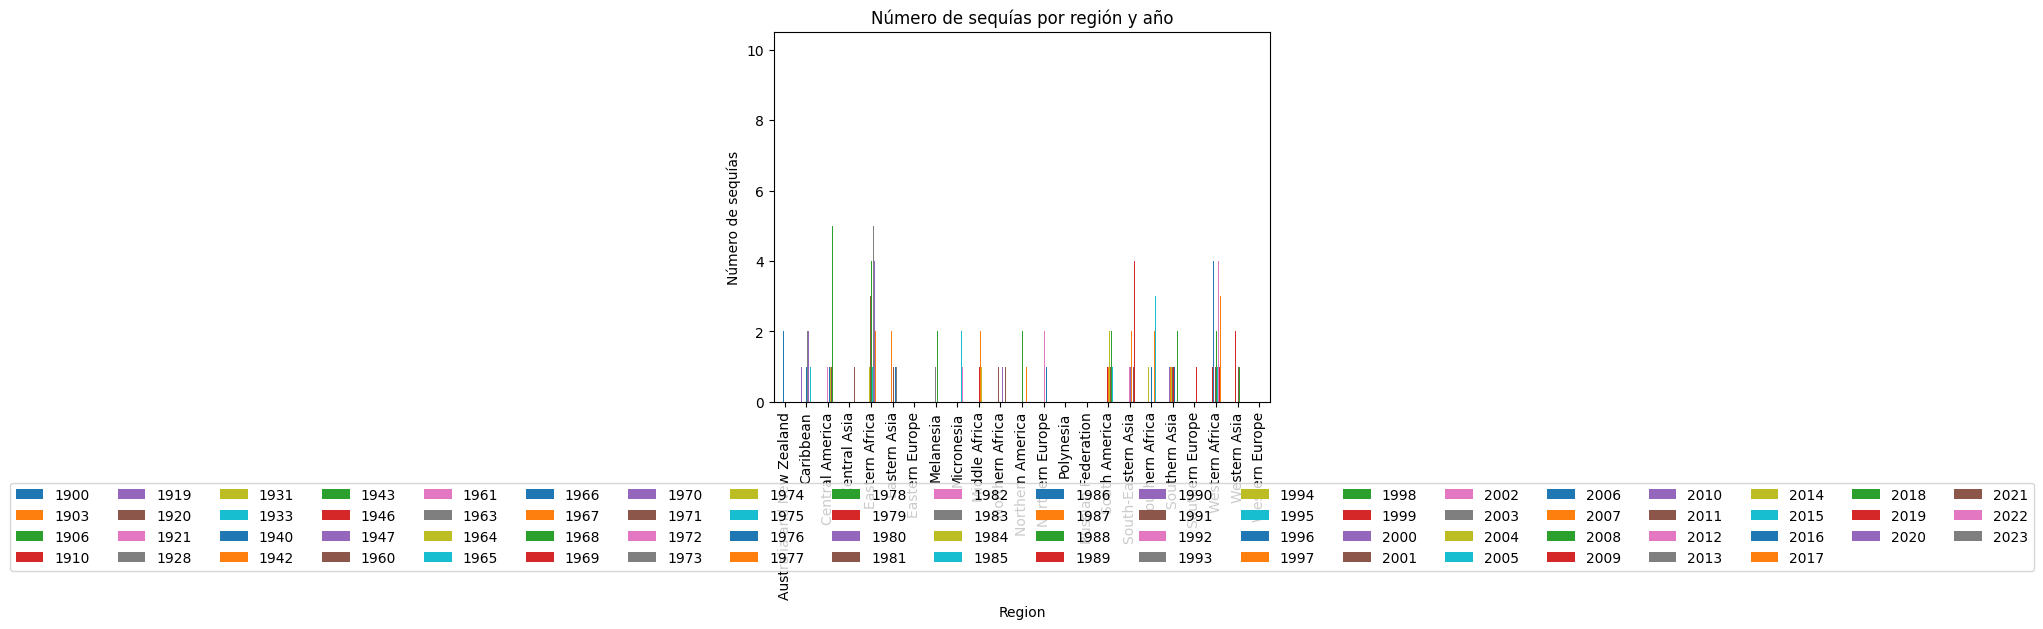

In [42]:
bx = pivot_table2.plot(kind='bar')
plt.title('Número de sequías por región y año')
plt.xlabel('Region')
plt.ylabel('Número de sequías')

# Cambiar la posición y el tamaño de la leyenda
bx.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=20)
plt.show()


In [43]:
pivot_table3 = pd.pivot_table(df_drought, index='Region', columns='Associated Dis', values='Country', aggfunc='count')
print(pivot_table3)

Associated Dis             Cold wave  Crop failure  Epidemic  Famine  Fire  \
Region                                                                       
Australia and New Zealand        NaN           NaN       NaN     NaN   NaN   
Caribbean                        NaN           1.0       NaN     NaN   NaN   
Central America                  NaN           NaN       NaN     3.0   NaN   
Central Asia                     NaN           NaN       NaN     NaN   NaN   
Eastern Africa                   NaN           4.0       NaN    20.0   NaN   
Eastern Asia                     NaN           NaN       NaN     NaN   2.0   
Eastern Europe                   NaN           NaN       NaN     NaN   NaN   
Melanesia                        1.0           NaN       NaN     NaN   NaN   
Middle Africa                    NaN           2.0       NaN     5.0   NaN   
Northern Africa                  NaN           NaN       NaN     1.0   NaN   
Northern America                 NaN           NaN       NaN    

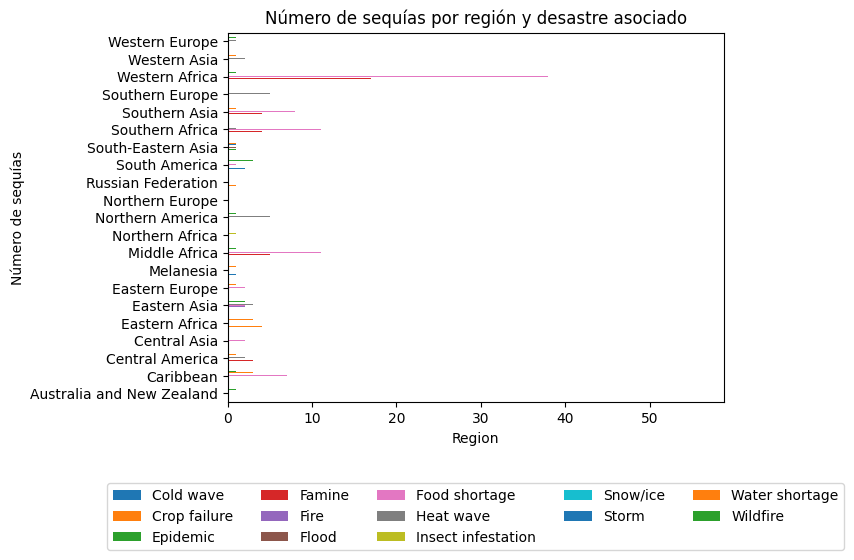

In [44]:

ax = pivot_table3.plot(kind='barh')

# Agregar un título y etiquetas a los ejes
plt.title('Número de sequías por región y desastre asociado')
plt.xlabel('Region')
plt.ylabel('Número de sequías')

# Cambiar la posición y el tamaño de la leyenda
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5)
plt.show()